In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('classificationData.csv')
data.head(5)
len(data)

3525

In [6]:
# df is the DataFrame, and column_list is a list of columns as strings (e.g ["col1","col2","col3"])
def seperateNumeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [7]:
columns= data.columns
seperateNumeric(data,columns)

In [8]:
data=data.fillna(data.mean())
data=data.dropna(axis=1, how='all')
# Specify the features of interest
features = ['Template_sequence_identity', 'Alignment_score',
       'Interactor_template_sequence_identity', 'Interactor_alignment_score',
       'Model/DOPE_score', 'Matrix_score', 'Solvent_accessibility_wt',
       'Solvent_accessibility_mut', 'pcv_salt_equal_wt',
       'pcv_salt_opposite_wt', 'pcv_hbond_wt', 'pcv_vdW_wt',
       'pcv_salt_equal_mut', 'pcv_salt_opposite_mut', 'pcv_hbond_mut',
       'pcv_vdW_mut', 'pcv_salt_equal_self_wt', 'pcv_salt_opposite_self_wt',
       'pcv_hbond_self_wt', 'pcv_vdW_self_wt', 'pcv_salt_equal_self_mut',
       'pcv_salt_opposite_self_mut', 'pcv_hbond_self_mut', 'pcv_vdW_self_mut',
       'dg_wt', 'backbone_hbond_wt', 'sidechain_hbond_wt', 'van_der_waals_wt',
       'electrostatics_wt', 'solvation_polar_wt', 'solvation_hydrophobic_wt',
       'van_der_waals_clashes_wt', 'entropy_sidechain_wt',
       'entropy_mainchain_wt', 'sloop_entropy_wt', 'mloop_entropy_wt',
       'cis_bond_wt', 'torsional_clash_wt', 'backbone_clash_wt',
       'helix_dipole_wt', 'water_bridge_wt', 'disulfide_wt',
       'electrostatic_kon_wt', 'partial_covalent_bonds_wt',
       'energy_ionisation_wt', 'entropy_complex_wt', 'number_of_residues_wt',
       'dg_mut', 'backbone_hbond_mut', 'sidechain_hbond_mut',
       'van_der_waals_mut', 'electrostatics_mut', 'solvation_polar_mut',
       'solvation_hydrophobic_mut', 'van_der_waals_clashes_mut',
       'entropy_sidechain_mut', 'entropy_mainchain_mut', 'sloop_entropy_mut',
       'mloop_entropy_mut', 'cis_bond_mut', 'torsional_clash_mut',
       'backbone_clash_mut', 'helix_dipole_mut', 'water_bridge_mut',
       'disulfide_mut', 'electrostatic_kon_mut', 'partial_covalent_bonds_mut',
       'energy_ionisation_mut', 'entropy_complex_mut',
       'number_of_residues_mut', 'IntraclashesEnergy1_wt',
       'IntraclashesEnergy1_mut', 'IntraclashesEnergy2_wt',
       'IntraclashesEnergy2_mut', 'Interface_contact_distance_wt',
       'Interface_contact_distance_mut']
# Extract the instances and target
x = data[features]
y = data.iloc[:,2:3:]
count = 0
count1=0
for k in data.feature_type:
    if k==0:
        count=count+1
    if k==1:
        count1=count1+1
print('Number of Mutation in Target Data which Effect the Mutation: ',count)
print('Number of Mutation in Target Data which  Does Not Effect the Mutation: ', count1)

Number of Mutation in Target Data which Effect the Mutation:  2171
Number of Mutation in Target Data which  Does Not Effect the Mutation:  1354


/Users/harun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/harun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/harun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/harun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConvers

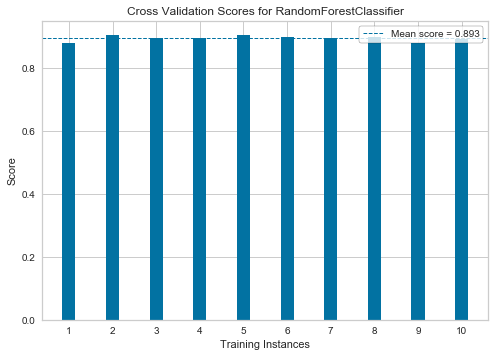

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import CVScores
# Create a new figure and axes
_, ax = plt.subplots()
cv= StratifiedShuffleSplit(n_splits=10, test_size=0.30)
# Create the cv score visualizer
oz = CVScores(
    RandomForestClassifier(n_estimators=100,max_depth=20), ax=ax, cv=cv, scoring='f1_weighted'
)

oz.fit(x, y)
oz.poof()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=220,max_depth=20)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

/Users/harun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8770140857900911

In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, 
                           n_informative=5, n_redundant=0, random_state=0, 
                           shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [16]:
from sklearn.ensemble import RandomForestClassifier  # parameters
rfc =RandomForestClassifier(bootstrap=False, class_weight='balanced',  #Additinal parameters
            criterion='entropy', max_depth=14,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=34, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test, y_pred)
accuracy_score(y_test,y_pred)


0.9366666666666666

In [17]:
from sklearn.ensemble import RandomForestClassifier  # parameters
rfc =RandomForestClassifier(bootstrap=False, class_weight='balanced',  #Additinal parameters
            criterion='entropy', max_depth=14,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=34, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test, y_pred)
accuracy_score(y_test,y_pred)


0.9353333333333333